<p align="center"> 
<img src="photo.png">
</p>

In [1]:
#To make sure the code an run on Python2 and Python3
from __future__ import unicode_literals, division, print_function

#import common dependencies and the most common one
import pandas as pd
import numpy as np
import skimage.io
from scipy import ndimage
from astropy.table import Table

#Initialize seed for code reproducibility
seed=42
def define_seed(seed):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
#import python astronomy and astrophysics package    
from astropy.io import fits

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_file='data/c4d_131207_031640_ooi_g_d1.002.fits'

In [3]:
hdu=fits.open(image_file)
hdu

In [4]:
hdu.info()

Filename: data/c4d_131207_031640_ooi_g_d1.002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     115   (2046, 4094)   float32   


In [5]:
hdu_prim=hdu[0].data
hdu_prim

array([[135.64743 , 120.36002 , 136.55037 , ..., 139.92029 , 110.92004 ,
        138.74672 ],
       [123.252235, 108.51481 , 143.95517 , ..., 128.51434 , 111.92276 ,
        127.99647 ],
       [115.88984 , 101.24401 , 141.60512 , ..., 136.19171 , 102.26458 ,
        127.15234 ],
       ...,
       [134.9613  , 143.71751 , 141.12396 , ..., 132.52669 , 143.96892 ,
        126.70306 ],
       [137.35106 , 138.37231 , 138.45241 , ..., 131.13362 , 138.15443 ,
        138.95444 ],
       [140.2818  , 151.04591 , 149.88643 , ..., 140.30962 , 140.96062 ,
        136.5318  ]], dtype=float32)

In [6]:
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(4094, 2046)


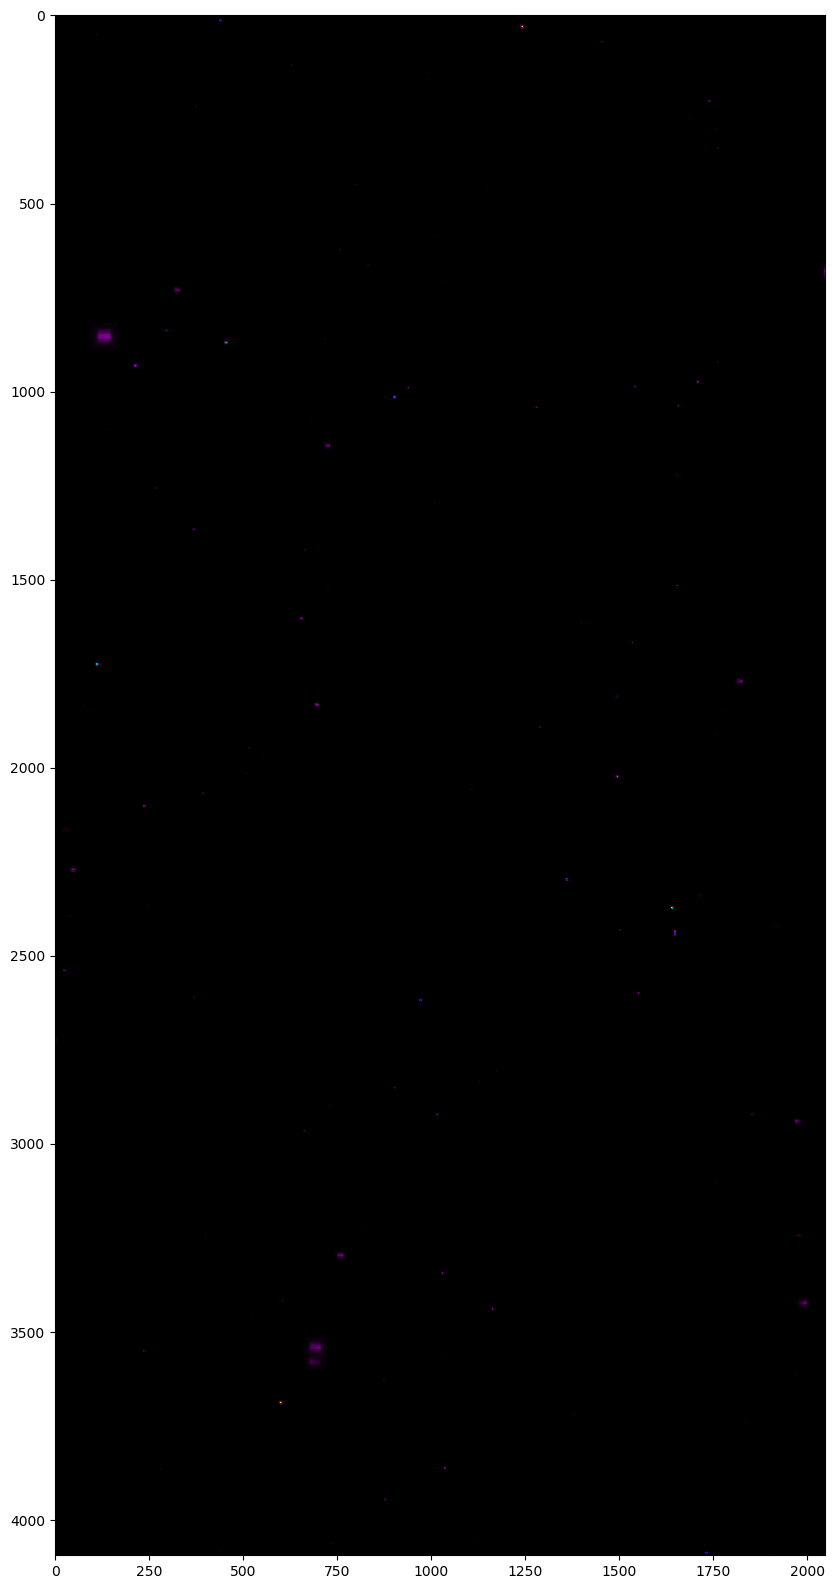

In [7]:
plt.figure(figsize=(40,20))
photo=plt.imshow(image_data)
photo.set_cmap('nipy_spectral')
plt.savefig('filtered_images.png')

In [8]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 55.125145
Max: 41735.684
Mean: 141.12599
Stdev: 88.90743


In [9]:
img=mpimg.imread('filtered_images.png')
print("The Dimensions of this image are: {}".format(img.shape))

The Dimensions of this image are: (2000, 4000, 4)


In [10]:
averages = [ sum(tup)/len(tup) for tup in img ]
np.savetxt("new_dimensions.csv", averages, delimiter=",")

In [11]:
NewZ = np.max(img, axis=2)
print("The Dimensions of this image became: {}".format(NewZ.shape))

The Dimensions of this image became: (2000, 4000)


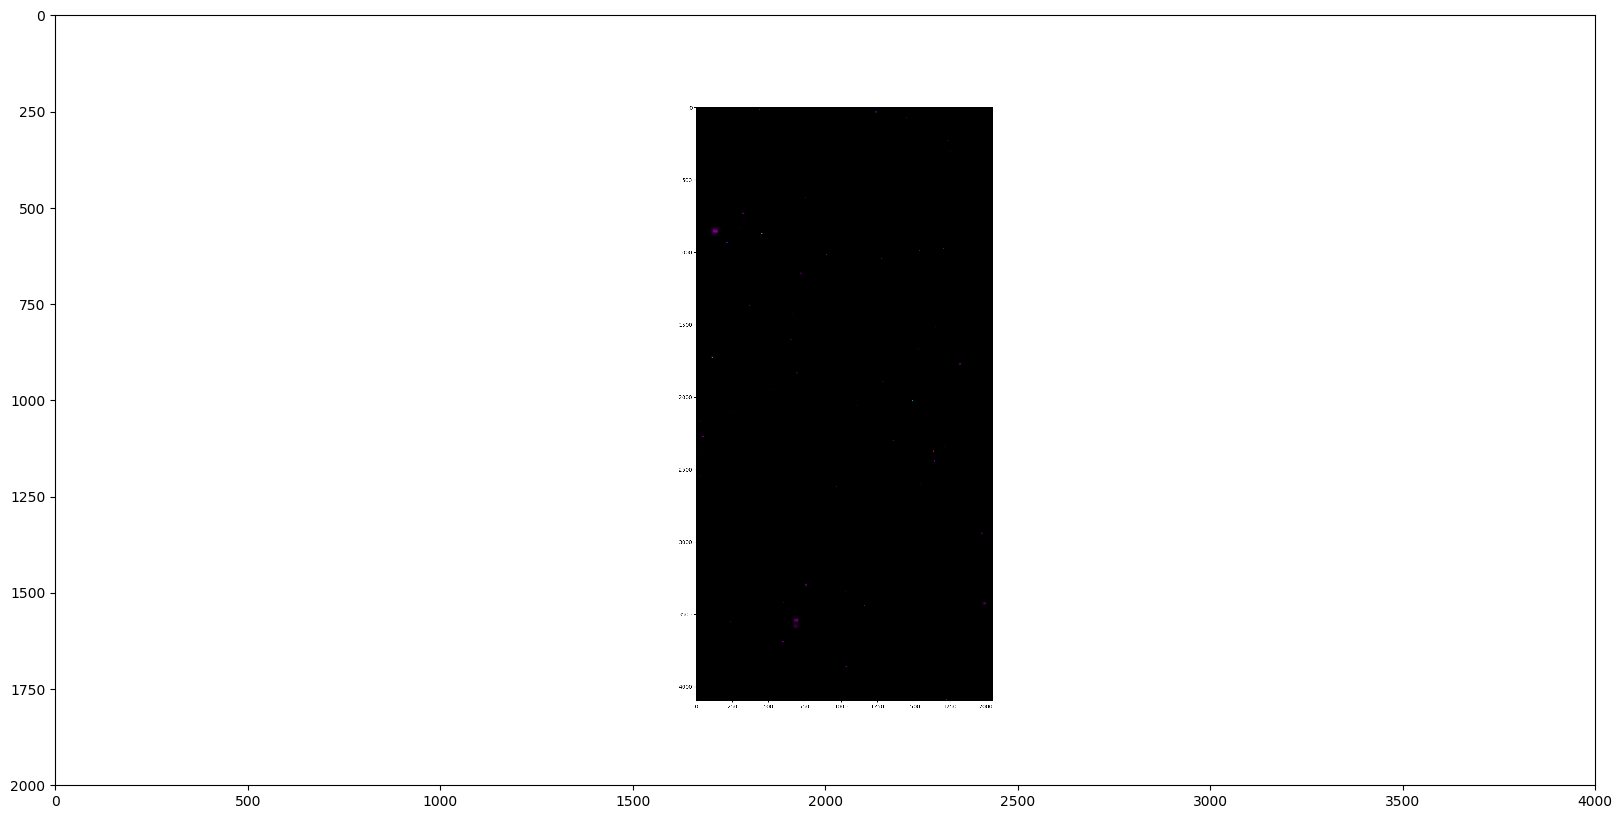

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(img)

In [13]:
image_data.flatten()

array([135.64743, 120.36002, 136.55037, ..., 140.30962, 140.96062,
       136.5318 ], dtype=float32)

In [14]:
print(type(image_data.flatten()))

<class 'numpy.ndarray'>


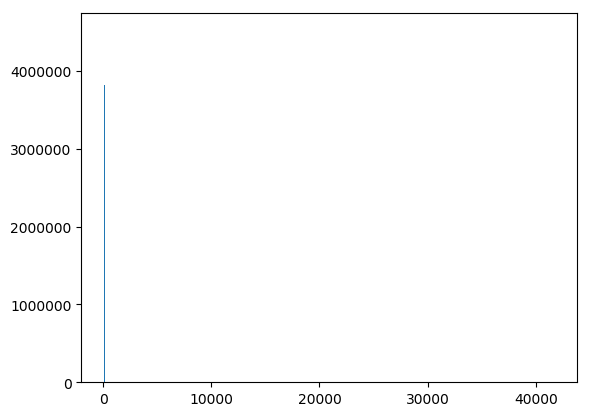

In [15]:
NBINS = 1000
histogram = plt.hist(image_data.flatten(), NBINS)

In [16]:
event_table=Table(hdu[0].data)
event_table

<Table length=4094>
   col0       col1      col2      col3   ...  col2043   col2044   col2045  
 float32    float32   float32   float32  ...  float32   float32   float32  
---------- --------- --------- --------- ... --------- --------- ----------
 135.64743 120.36002 136.55037 139.96637 ... 139.92029 110.92004  138.74672
123.252235 108.51481 143.95517 137.57039 ... 128.51434 111.92276  127.99647
 115.88984 101.24401 141.60512 138.70695 ... 136.19171 102.26458  127.15234
  123.3585   99.1834 136.16104  139.3081 ...  138.1939  97.82613  128.63272
124.513954 97.082275 141.30011 139.98058 ... 131.17847 105.07011 124.527885
  132.6215   96.6585 133.06488  135.6746 ... 143.30183 103.25041  136.02669
124.100044 101.99247 137.62524  139.6768 ...  131.0786 116.09894 123.969185
 129.00278 107.92666 135.27275 141.91753 ... 136.95056 112.42119   132.0682
 137.34232  114.7876 132.90344  138.2762 ... 127.39439  117.4821  129.37053
 131.89127 115.13075 137.08401 138.76604 ... 126.05661 123.64305  128.72157
       ...       ...       ...       ... ...       ...       ...        ...
 166.99242  140.5537 138.38786 138.16628 ... 133.12766 133.20424  129.49817
 172.06764   139.465 142.77293 138.77509 ... 135.97055 139.74062  123.30593
 162.55363 142.18082  137.8455 140.93887 ... 132.82468 135.04477  111.16959
 151.85643 139.11621 136.85126 142.40245 ... 129.94328 132.06212  120.92011
 160.72388 135.14516 144.04962 135.17207 ... 136.05995 133.71887 121.210915
 150.21922 147.24298  141.8881 143.14938 ... 129.89519 140.04947  120.50073
 137.99744 151.79825 142.15802 146.51814 ... 134.56924  146.0848  120.73964
  134.9613 143.71751 141.12396  137.8105 ... 132.52669 143.96892  126.70306
 137.35106 138.37231 138.45241 138.77516 ... 131.13362 138.15443  138.95444
  140.2818 151.04591 149.88643 151.46585 ... 140.30962 140.96062   136.5318

In [17]:
from matplotlib.colors import LogNorm

# Scale the image to Log

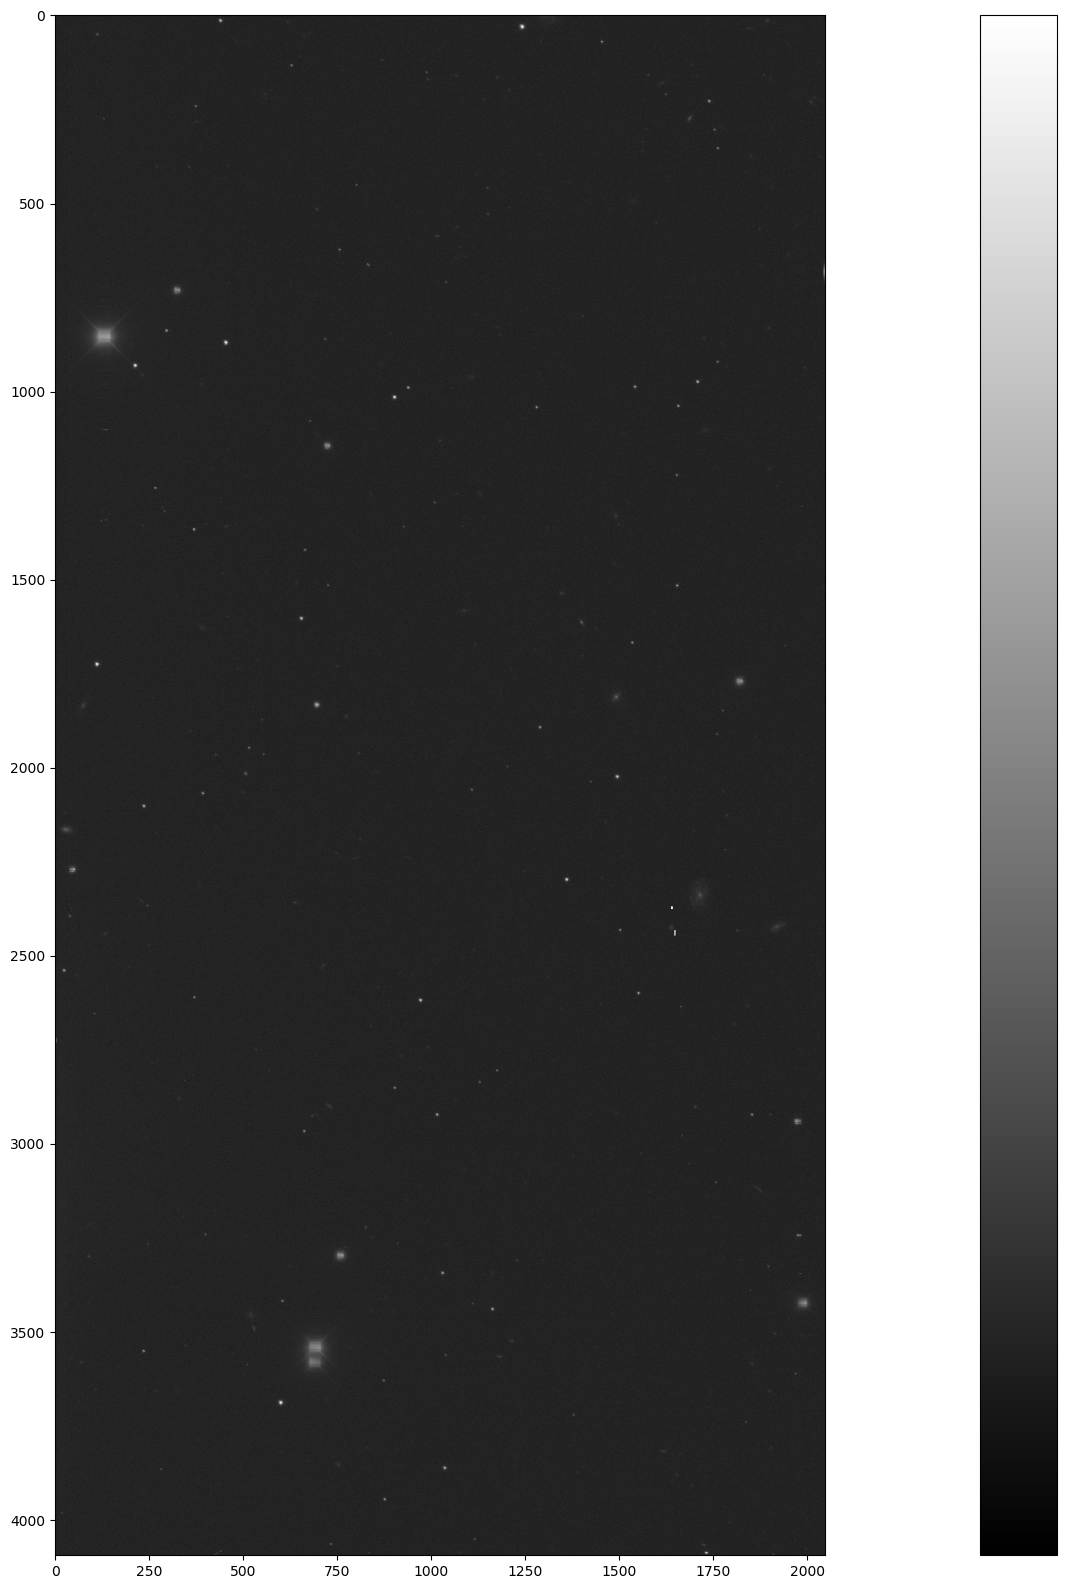

In [18]:
plt.figure(figsize=(40,20))
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])
cbar.set_cmap('nipy_spectral')
plt.savefig("scaled_image.pdf")
plt.savefig("scled_image.png")

**The source detection problem is to identify which pixels contain sources and to separate the sources from the background**

# SciKit Image implementation to extract the coordinate points of these region with high pixels value

In [19]:
import os
import sys
import argparse
import matplotlib.pyplot as mpl
import numpy as np
import astropy.io.fits as pyfits
import skimage.morphology as morph
import skimage.exposure as skie
from contextlib import suppress
#creates a new image using an mapping arc sinh that captures the full dynamic range effectively
#It locates lower and upper bounds that should include only stars
#The parameters would probably have to be refined to optimize the extraction of stars from background
limg = np.arcsinh(image_data)
limg = limg / limg.max()
low = np.percentile(limg, 0.25)
high = np.percentile(limg, 99.5)
opt_img  = skie.exposure.rescale_intensity(limg, in_range=(low,high))
#Here we need to return a boolean array of the point that are on the loca maximum, as True and False
lm =morph.local_maxima(limg)

x1, y1 = np.where(lm.T == True)
v = limg[(y1,x1)]
lim = 0.7
x2, y2 = x1[v > lim], y1[v > lim]

/home/robotics/Downloads/usr/local/anaconda/lib/python3.6/site-packages/skimage/morphology/extrema.py:278: FutureWarning: Conversion of the second argument of issubdtype from `'half'` to `np.floating` is deprecated. In future, it will be treated as `np.float16 == np.dtype('half').type`.
  if np.issubdtype(img.dtype, 'half'):
/home/robotics/Downloads/usr/local/anaconda/lib/python3.6/site-packages/skimage/morphology/extrema.py:111: FutureWarning: Conversion of the second argument of issubdtype from `'half'` to `np.floating` is deprecated. In future, it will be treated as `np.float16 == np.dtype('half').type`.
  if np.issubdtype(img.dtype, 'half'):


**A new image that is scaled between the lower and upper limits that will be used for displaying the star map**

In [20]:
print("These are the values of x2: {}".format(x2))
np.savetxt("x_coordinate.csv", x2, delimiter=",")
print(x2.shape)

print("These are the values of y2: {}".format(y2))
np.savetxt("y_coordinate.csv", y2, delimiter=",")
print(y2.shape)

These are the values of x2: [  24   46   51  111  143  144  144  213  235  236  296  330  369  393
  440  454  599  654  662  695  695  699  704  729  765  876  902  938
  971 1015 1029 1035 1162 1241 1279 1288 1359 1453 1494 1501 1534 1541
 1550 1639 1646 1647 1647 1652 1653 1656 1707 1730 1738 1825 1852 1967
 1971 1974 1995 2045]
(60,)
These are the values of y2: [2539 2276 2271 1725  865  856  865  931 3551 2102  838  731 1367 2068
   14  870 3688 1603 2967 1829 1837 1833 3543 1144 3297 3945 1015  990
 2618 2923 3344 3862 3440   30 1042 1893 2297   70 2024 2432 1668  987
 2599 2373 2442 2435 2438 1222 1516 1038  974 4088  228 1771 2923 2940
 2945 3243 3424  682]
(60,)


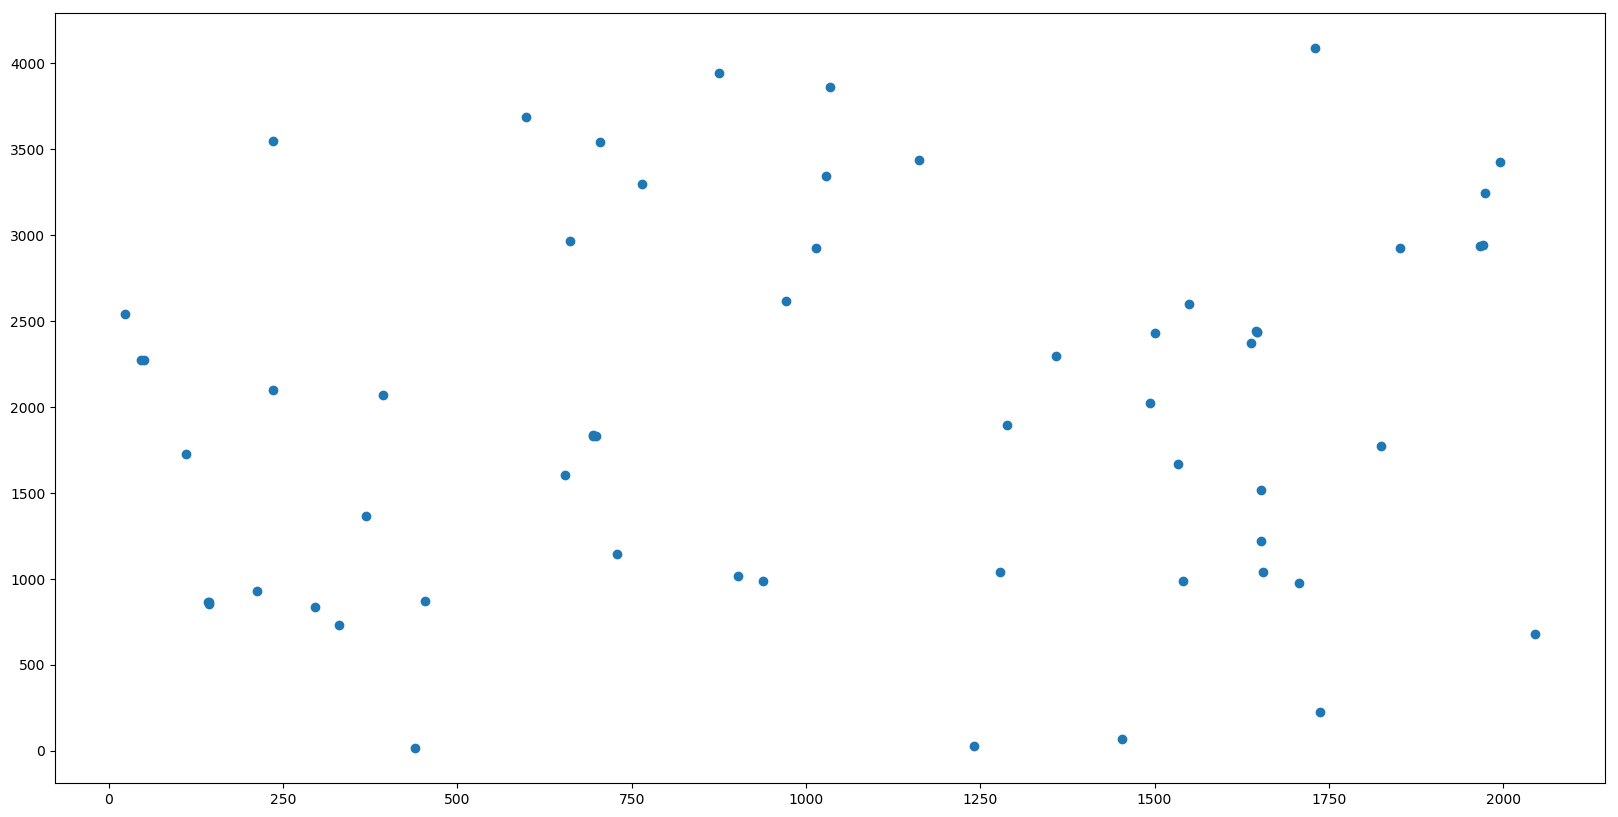

In [21]:
#Plot all these cpprdinate points as scatter plot
plt.figure(figsize=(20,10))
plt.scatter(x2,y2)
plt.show()

In [22]:
print(image_data.shape)

(4094, 2046)


**X2 and Y2 are the coordinates of the stars detected in the image, and it's clear that 60 interesting areas where detected with a high pixels intensity**

Morphological Transformations
This implementation requires two inputs:
1. The original image
2. Kernel(Structuring element)
<br>

**cv2.morphologyEx():** is just erosion followed by dilation, and it is useful in removing noise.

In [23]:
import cv2
#Apply morphological transformation
kernel = np.ones((100,100),np.uint8)
img_morph = cv2.morphologyEx(image_data, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(20,10))
# save image
cv2.imwrite('test_outputs/stars_morph.png', img_morph)
plt.savefig("stars_morph.jpg")
plt.show()

<Figure size 2000x1000 with 0 Axes>

<p align="center"> 
<img src="test_outputs/stars_morph.png">
</p>

In [24]:
gray_img = cv2.cvtColor(image_data, cv2.COLOR_GRAY2BGR)

# grayscale image represented as a 2-d array
print(gray_img.shape)

(4094, 2046, 3)


In [25]:
average_color_per_row = np.average(image_data, axis=1)
average_color = np.average(average_color_per_row, axis=0)
average_color = np.ubyte(average_color)
print(average_color)

141


It's a three dimension image => (4094, 2046, 3)


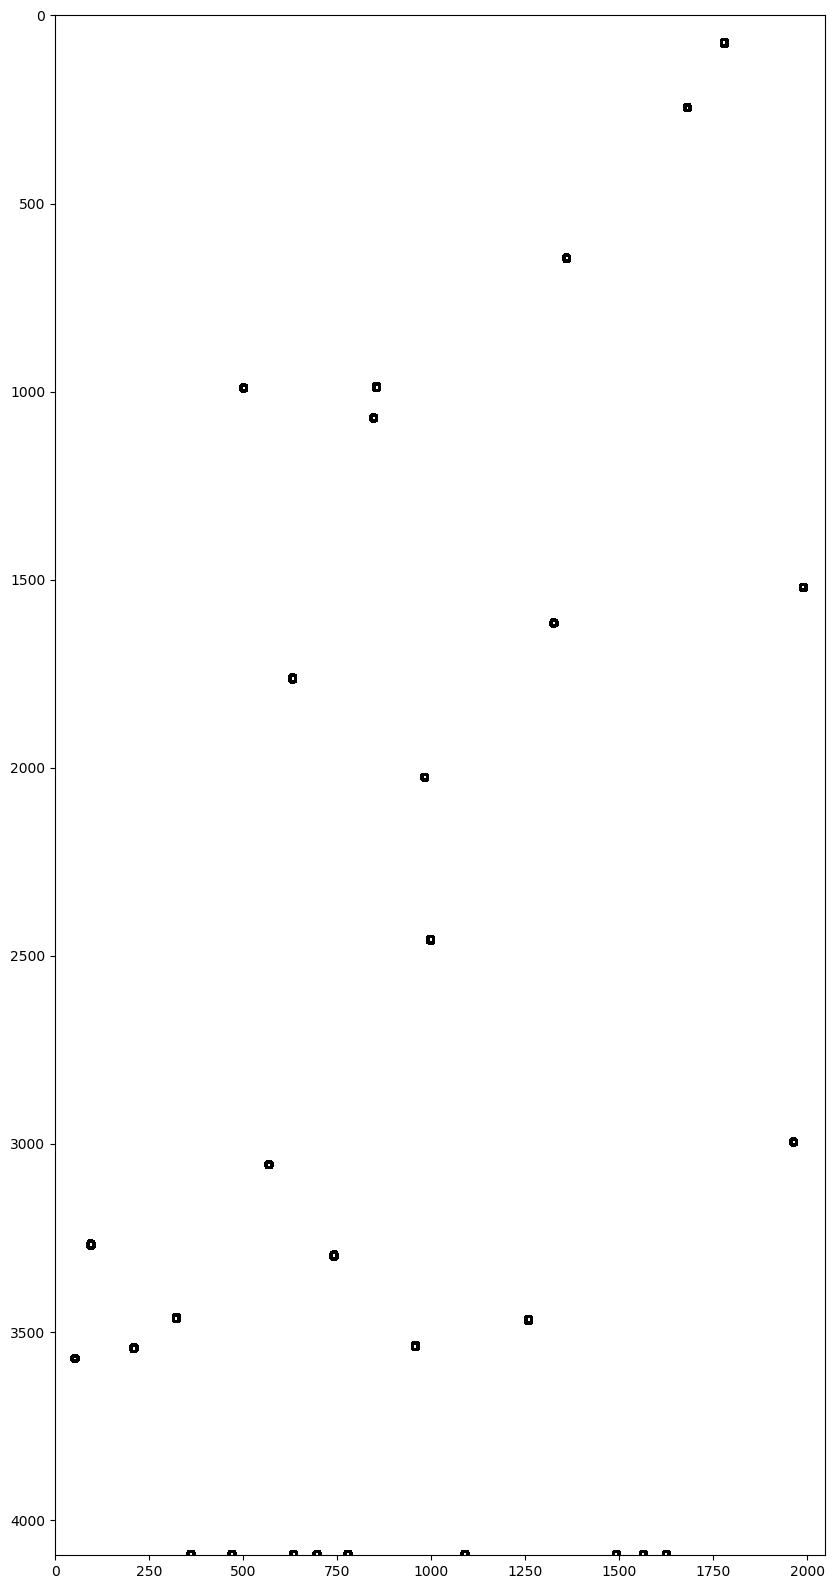

In [38]:
stars_gray = cv2.cvtColor(unknown, cv2.COLOR_GRAY2BGR)
stars_preprocessed = cv2.GaussianBlur(stars_gray, (1, 1), 1)

# get binary image
_, stars_binary = cv2.threshold(stars_preprocessed, 55.5, 255, cv2.THRESH_BINARY)

# invert image to get coins
stars_binary = cv2.bitwise_not(stars_binary)
plt.figure(figsize=(40,20))
plt.imshow(stars_binary)
print("It's a three dimension image => {}".format(stars_binary.shape))

In [39]:
# find contours
ret, thresh = cv2.threshold(unknown, 15, 255,0)
#this image contain 3 argument:
# 1. Source image
# 2. Contours to be retrieved
# 3. Contours Approximation method
im2, stars_contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
stars_and_contours = np.copy(unknown)

# find contours of large enough area
min_stars_area = 0.5
large_contours = [cnt for cnt in stars_contours if cv2.contourArea(cnt) > min_stars_area]

# draw contours
cv2.drawContours(stars_and_contours, large_contours, -1, (280,0,0))

# print number of contours
print('Number of stars are  =======> %d' % len(large_contours))
print('Counting is Done!!!!')

Number of stars are  =======> 49
Counting is Done!!!!


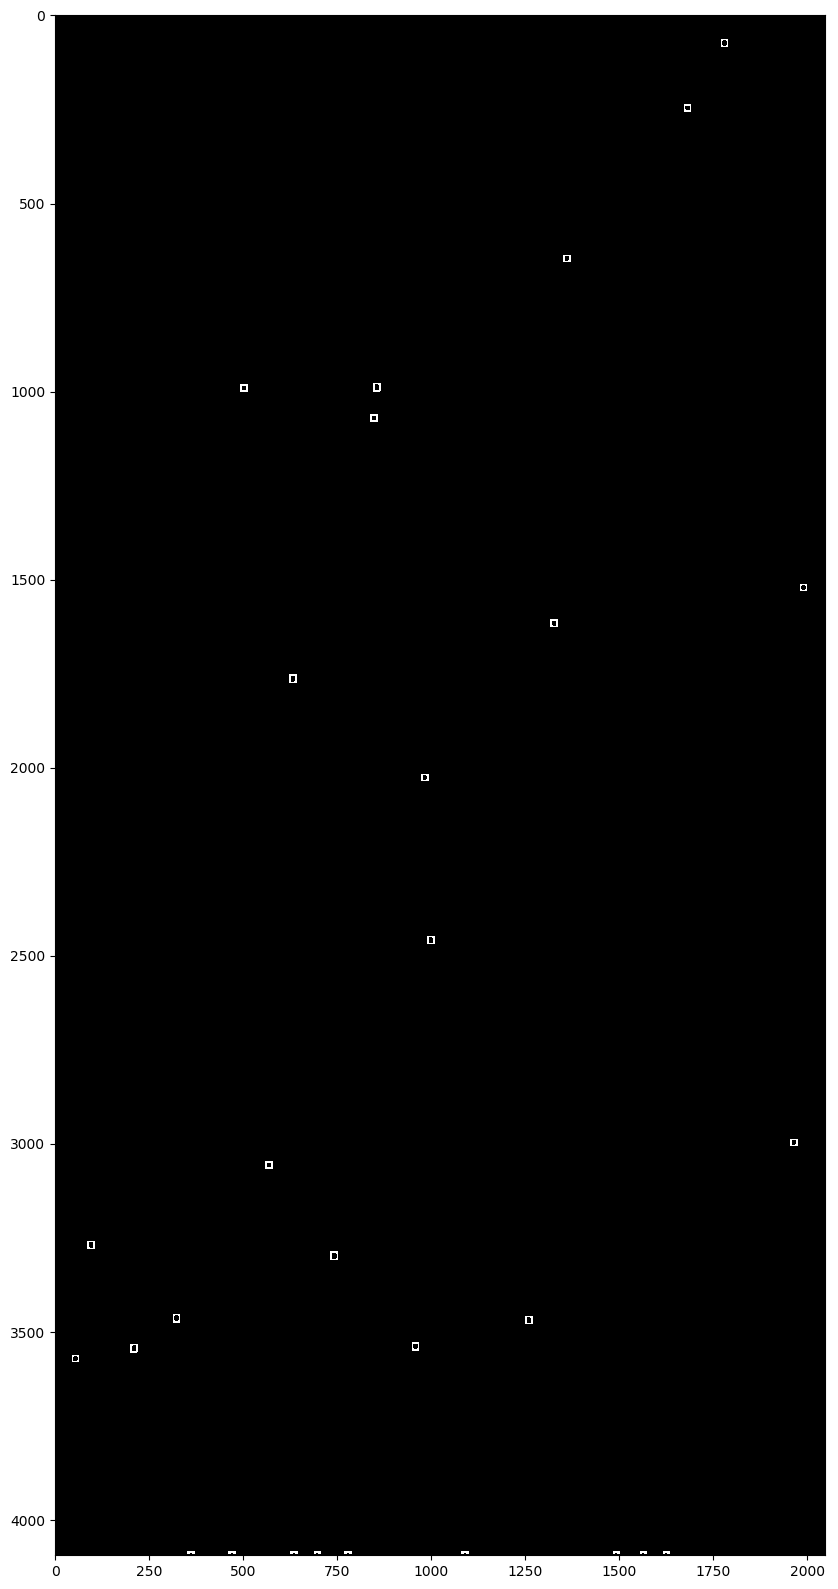

In [40]:
#Find the contour around the stars in the image
bounding_img = np.copy(unknown)
#for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    df_image0=cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 280, 0), 3)
plt.figure(figsize=(40,20))    
plt.imshow(df_image0, cmap='gray')   
plt.savefig("box.png")

In [42]:
ratio = unknown.shape[0] / float(resized.shape[0])
resized = imutils.resize(unknown, width=300)
for c in large_contours:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)
 
	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(unknown, [c], -1, (0, 255, 0), 2)
	cv2.putText(unknown, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)
 
	# show the output image
	cv2.imshow("Image", unknown)
	cv2.waitKey(0)

NameError: name 'resized' is not defined

# Image Segmentation with Watershed Algorithm
**Using this approach will help increase the area of this object with high pixel intensity**

In [28]:
img = cv2.imread('stars_morph.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,55.5,280,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((15,15),np.uint8)
print('The dimension of this kernel is: {}'.format(kernel.shape))
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
print('the dimension of this array become: {}'.format(opening.shape))
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=0)
print("The shape of this image is:{}".format(sure_bg.shape))
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.01*dist_transform.max(),255,0)
print('The shape of this image is: {}'.format(dist_transform.shape))
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
print('The dimension of this image after filtering: {}'.format(sure_fg.shape))
plt.savefig("test_outputs/image_after_filtering.jpg")

The dimension of this kernel is: (15, 15)
the dimension of this array become: (4094, 2046)
The shape of this image is:(4094, 2046)
The shape of this image is: (4094, 2046)
The dimension of this image after filtering: (4094, 2046)


<Figure size 640x480 with 0 Axes>

**After specifiying the iteration in dilation operation the area become of the object increase with a shown CoM**

In [29]:
#Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
#Add one to all labels so that sure background is not 0, but 1
markers = markers+1
#Now, mark the region of unknown with zero
markers[unknown==255] = 1

In [30]:
markers = cv2.watershed(img,markers)
img[markers == 2] = [280,1,2]

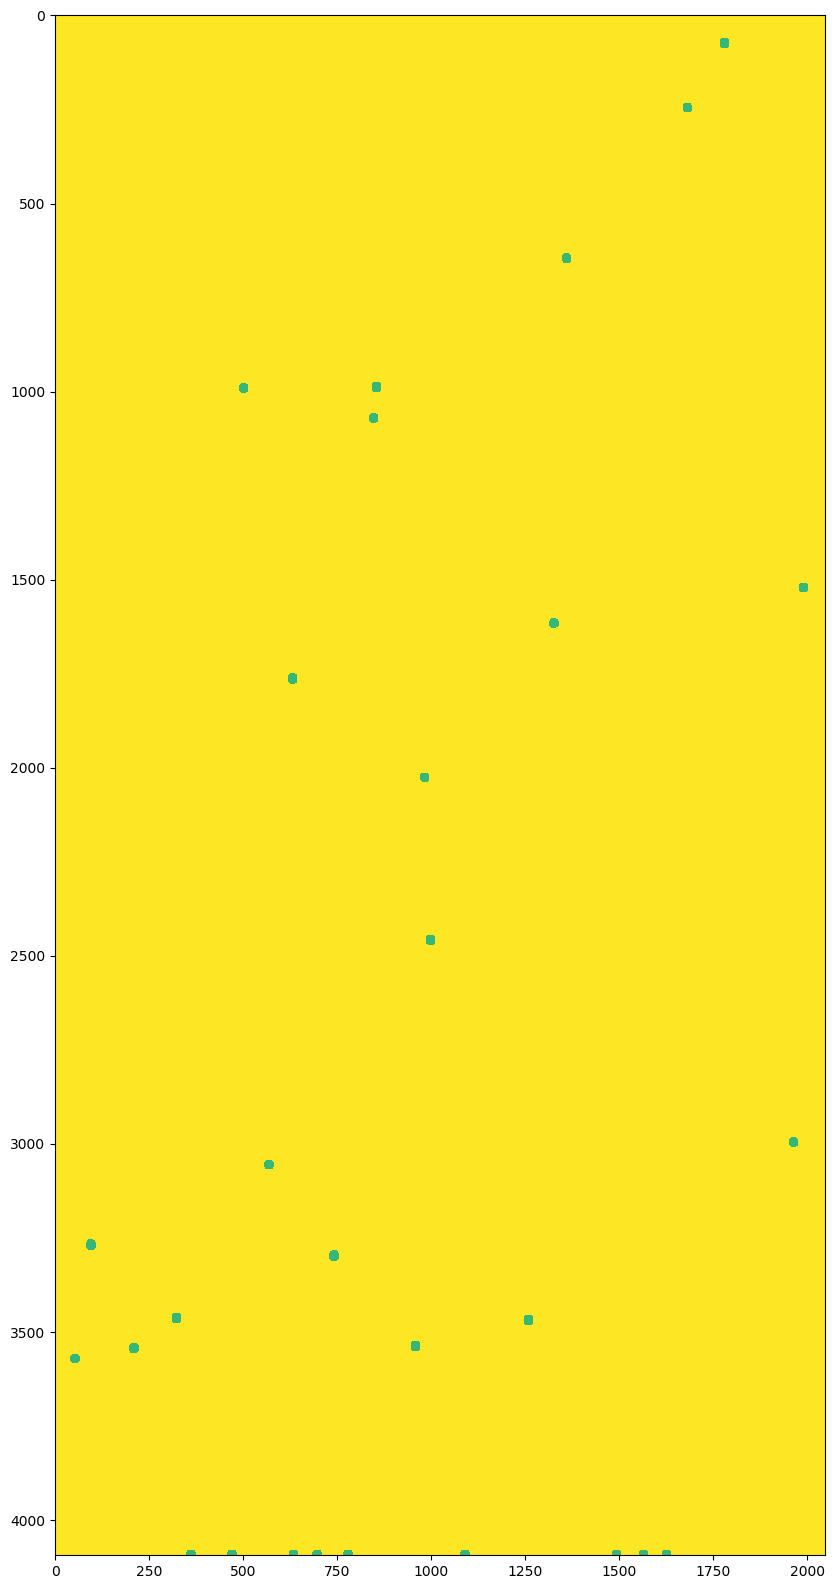

In [31]:
plt.figure(figsize=(40,20))
plt.imshow(markers)

In [32]:
ret, thresh = cv2.threshold(unknown, 127, 255,0)
#this image contain 3 argument:
# 1. Source image
# 2. Contours to be retrieved
# 3. Contours Approximation method
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(im2,start,end,[0,255,0],2)
    cv2.circle(im2,far,5,[0,0,255],-1)
plt.savefig("test_outputs/image_with_contours.png")

<Figure size 640x480 with 0 Axes>

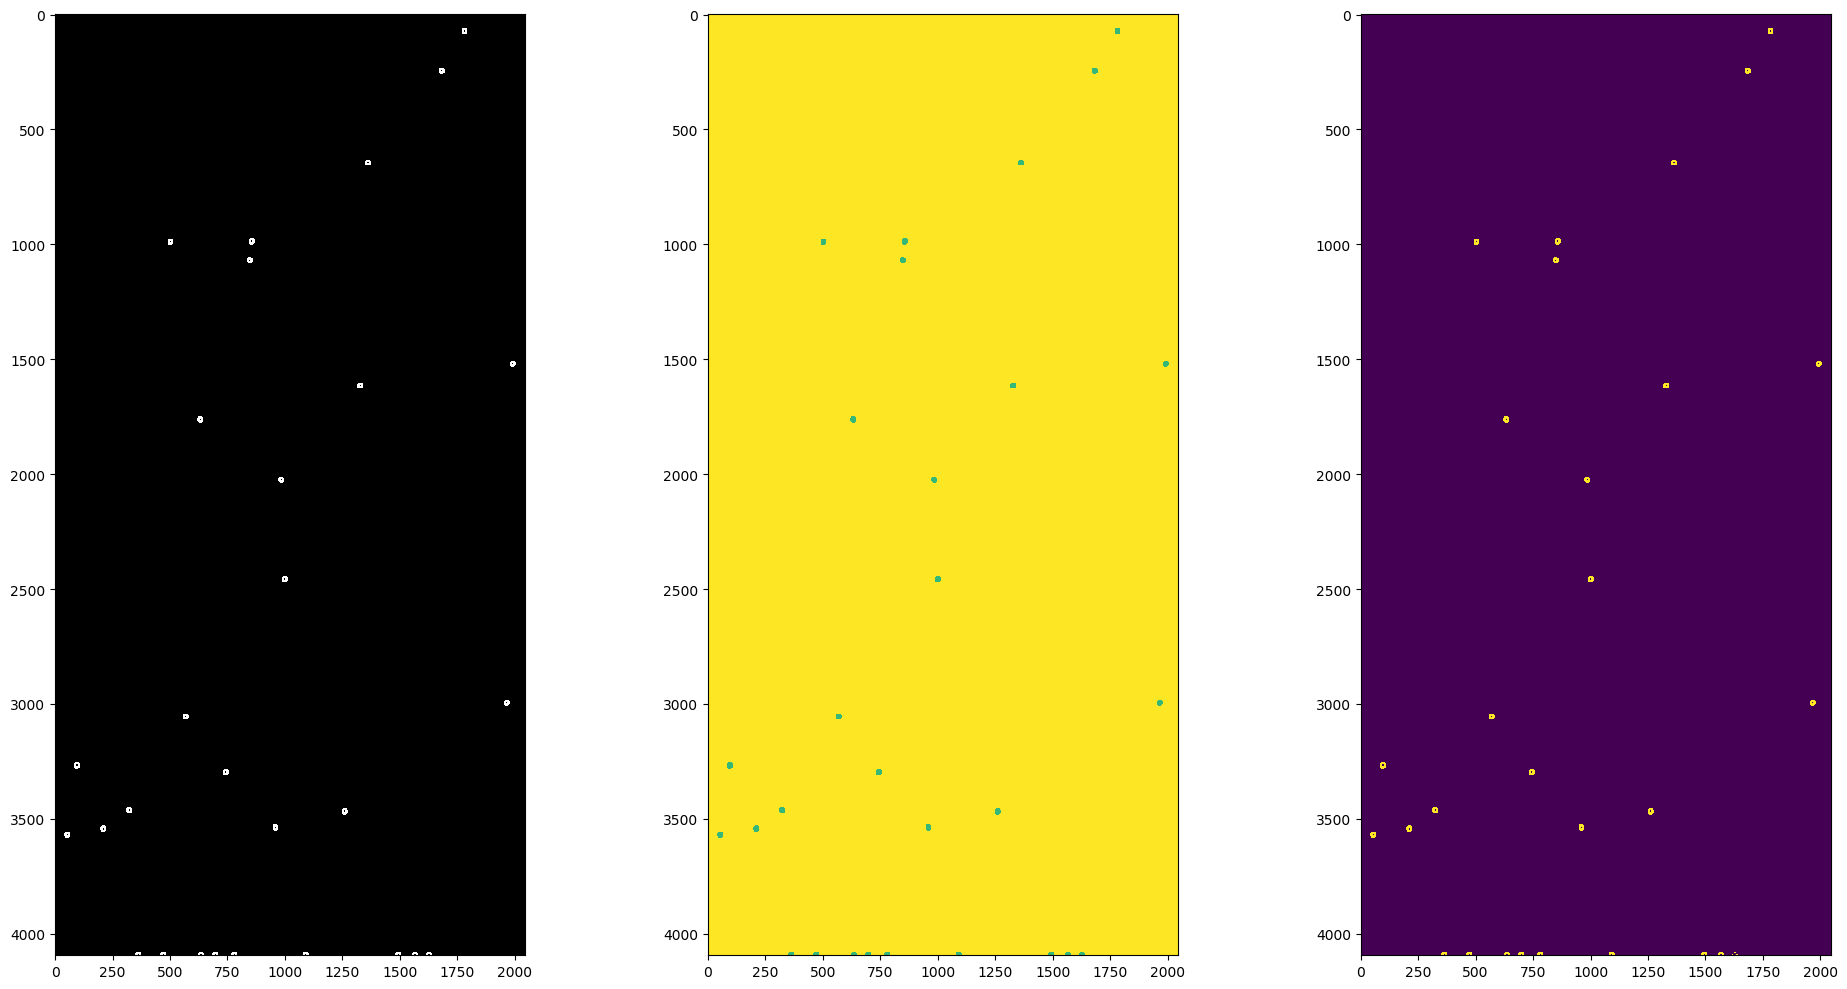

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
#Image Segmentation with Watershed Algorithm
plt.imshow(unknown, cmap='gray')
plt.subplot(1, 3, 2)
#Marker labelling
plt.imshow(markers)
plt.subplot(1, 3, 3)
#finding contours
plt.imshow(im2)
plt.tight_layout()
plt.show()

**Draw the bounding box Method 1**

49


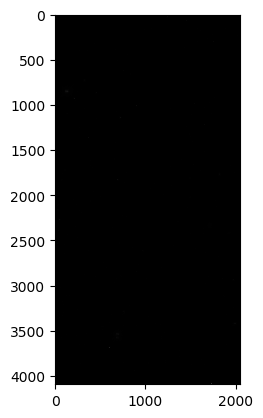

In [34]:
for c in contours:
    x,y,w,h=cv2.boundingRect(c)
    cv2.rectangle(image_data, (x, y), (x+w, y+h), (0, 255, 0), 2)
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a red 'nghien' rectangle
    cv2.drawContours(image_data, [box], 0, (0, 0, 255))
    # finally, get the min enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # convert all values to int
    center = (int(x), int(y))
    radius = int(radius)
    # and draw the circle in blue
    img = cv2.circle(image_data, center, radius, (255, 0, 0), 2)
print(len(contours))
df=cv2.drawContours(image_data, contours, -1, (255, 255, 0), 1)
plt.imshow(df, cmap='gray')

**Draw the bounding box Method 2**

**No Output :(**

# So far the image is Thresholded with Watershed algorithm and the contours has been found, Now to draw the bounding box around the object

# Testing convex hull on x2 y2 array data
**First convert the corrdinate to an iteger or slices**

In [35]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import pandas as pd
points=list(zip(x2, y2))
print("The Dimension of this array is: {}".format(np.shape(points)))

The Dimension of this array is: (60, 2)


**Secondly convert these intergers to array with (60,2)**

In [36]:
points=np.array(points)
print('The dimension of this array is: {}'.format(points.shape))

The dimension of this array is: (60, 2)


**This validate that the array still with the same dimension but different type**

# Now Create the bounding box arround the data collected (x2,y2) of the **Pixel intensity**

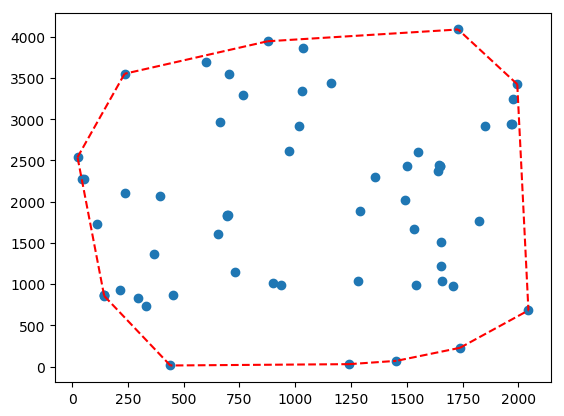

In [37]:
hull = ConvexHull(points)
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    
    plt.plot(points[simplex, 0], points[simplex, 1], 'r--')

# Using AplPy method

INFO: Auto-setting vmin to  1.103e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.403e+02 [aplpy.core]


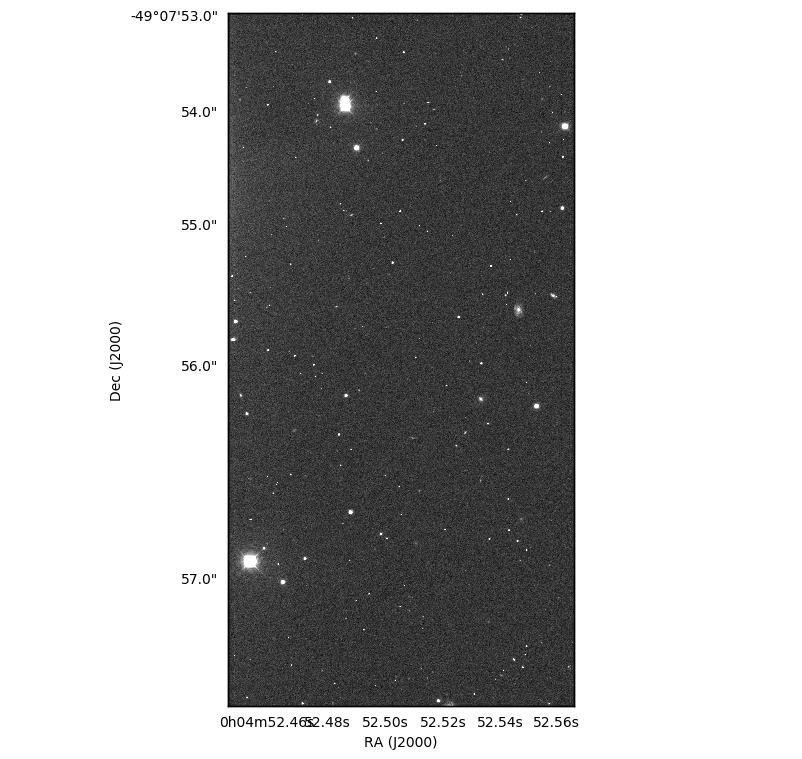

In [62]:
import aplpy
gc=aplpy.FITSFigure('data/c4d_131207_031640_ooi_g_d1.002.fits')
gc.show_grayscale()

In [59]:
gc.show_colorscale()
gc.show_colorscale(cmap='gist_heat')

INFO: Auto-setting vmin to  1.103e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.403e+02 [aplpy.core]
INFO: Auto-setting vmin to  1.103e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.403e+02 [aplpy.core]


In [93]:
import numpy as np
raw_data="test_outputs/x_y_coord.csv"
data = np.loadtxt(raw_data, delimiter=",")
ra, dec = data[:, 0], data[:, 1]
gc.show_markers(ra, dec, edgecolor='green', facecolor='none',
                marker='o', s=10, alpha=0.5)

In [66]:
gc.list_layers()


  There is one layer in this figure:

   -> marker_set_1


In [87]:
gc.show_markers(ra, dec, layer='marker_set_1', edgecolor='red',
                facecolor='none', marker='o', s=50, alpha=2)

In [88]:
#save the plot
gc.save('myfirstplot.png')

In [51]:
from PIL import Image as pil_image
from PIL.ImageDraw import Draw
from os.path import isfile

data=fits.open('data/c4d_131207_031640_ooi_g_d1.002.fits')
hdu_prim=hdu[0].data
def expand_path(p):
    if isfile("df_train/" + p) : return "df_train" +p
    if isfile("df_test/" + p) : return "df_test" + p
    return p

def read_raw_image(p):
    return pil_image.open(expand_path(p))

def draw_dot(draw, x, y):
    
    draw.ellipse(((x-5,y-5),(x+5,y+5)), fill='red', outline='red')

def draw_dots(draw, coordinates):
    for x,y in coordinates: draw_dot(draw, x, y)

def bounding_rectangle(list):
    x0, y0 = list[0]
    x1, y1 = x0, y0
    for x,y in list[1:]:
        x0 = min(x0, x)
        y0 = min(y0, y)
        x1 = max(x1, x)
        y1 = max(y1, y)
    return x0,y0,x1,y1

filename,coordinates = hdu_prim
box = bounding_rectangle(coordinates)
img = read_raw_image(filename)
draw = Draw(img)
draw_dots(draw, coordinates)
draw.rectangle(box, outline='red')
img        

ValueError: too many values to unpack (expected 2)